**raw_data.csv**

**범주형(object)**--

gender

country

subscription_type → Spotify 구독 유형(무료, 프리미엄, 가족, 학생)

device_type → 사용 기기(모바일, 데스크톱, 웹)

**수치형(int/float)**--

age

user_id

listening_time → 하루에 듣는 데 소요된 시간(분)

songs_played_per_day → 매일 재생된 노래 수

skip_rate → 건너뛴 노래의 비율

ads_listened_per_week → 주당 청취된 광고 수

offline_listening → 오프라인 모드 사용법

is_churned → 대상 변수(0 = 활성, 1 = 이탈)

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid", palette="muted")

df = pd.read_csv("../data/raw_data.csv")

# enable inline plotting
%matplotlib inline

In [ ]:
# 기본 정보 확인
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         7760 non-null   float64
 6   songs_played_per_day   7760 non-null   float64
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 750.1+ KB


,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26.0,23.0,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141.0,62.0,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199.0,38.0,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36.0,2.0,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250.0,57.0,0.36,Mobile,0,1,1


In [ ]:
df.describe() # 기초 통계량 확인

,user_id,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,8000.00000,8000.000000,7760.000000,7760.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4000.50000,38.860250,154.189433,50.158763,0.355516,6.943875,0.747750,0.258875
std,2309.54541,17.517943,83.943074,28.457090,0.454842,13.617953,0.434331,0.438044
min,1.00000,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.75000,27.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,4000.50000,38.000000,154.000000,50.000000,0.305000,0.000000,1.000000,0.000000
75%,6000.25000,49.000000,227.000000,75.000000,0.460000,5.000000,1.000000,1.000000
max,8000.00000,198.000000,299.000000,99.000000,4.980195,49.000000,1.000000,1.000000


In [ ]:
df.isnull().sum() # 결측값 확인

user_id                    0
gender                     0
age                        0
country                    0
subscription_type          0
listening_time           240
songs_played_per_day     240
skip_rate                  0
device_type                0
ads_listened_per_week      0
offline_listening          0
is_churned                 0
dtype: int64

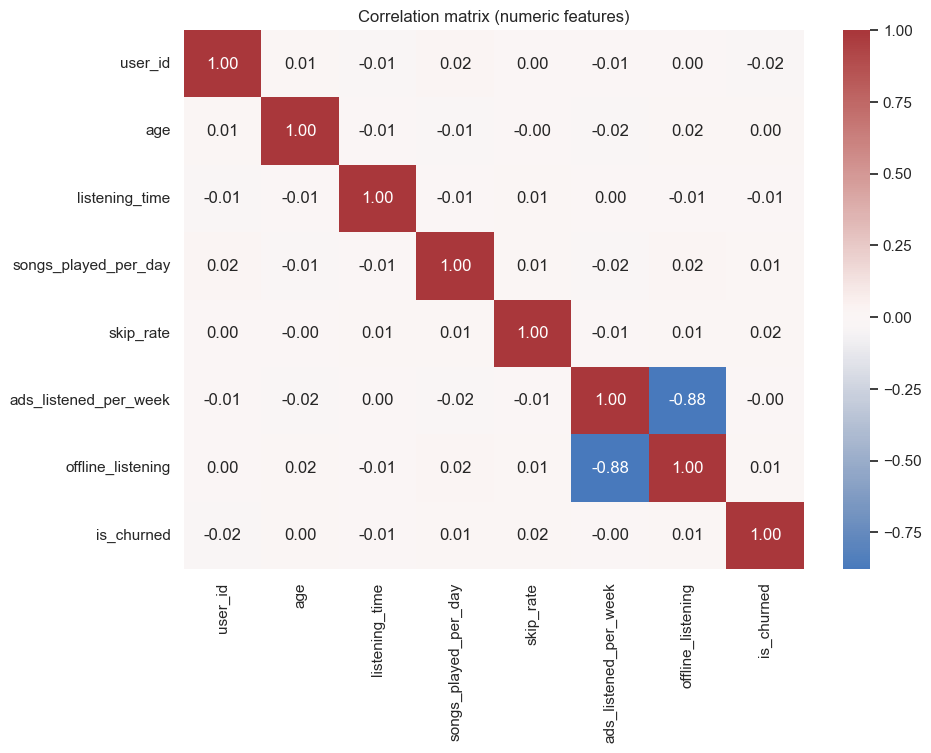

skip_rate                0.016598
user_id                  0.015994
offline_listening        0.012754
songs_played_per_day     0.009919
listening_time           0.007325
age                      0.004666
ads_listened_per_week    0.002279
Name: is_churned, dtype: float64

In [ ]:
# 수치형 변수 상관 히트맵 및 is_churned와의 상관 정렬
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()

# is_churned 와의 상관 절대값 기준 정렬
churn_corr = corr['is_churned'].drop('is_churned').abs().sort_values(ascending=False)
churn_corr

# 전체 |corr| < 0.02 수준으로 
# is_churned 와 수치형 변수간의  유의미한 상관관계 없음
## == 단일 수치 변수만 보고 바로 이탈 판단이 어려움

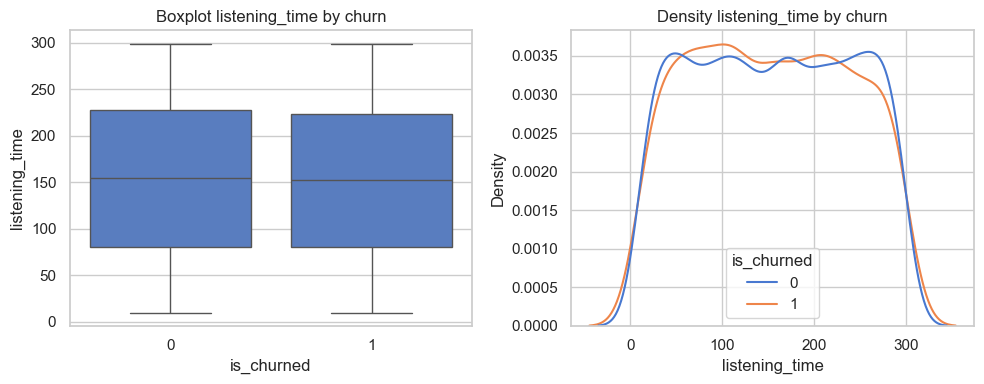

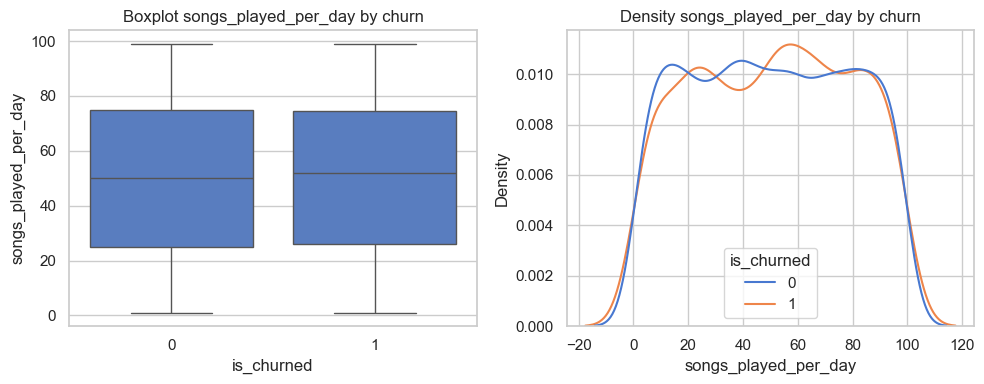

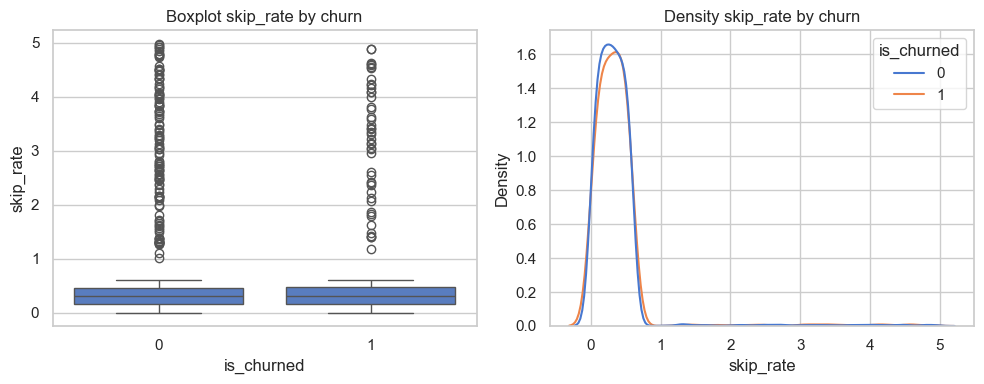

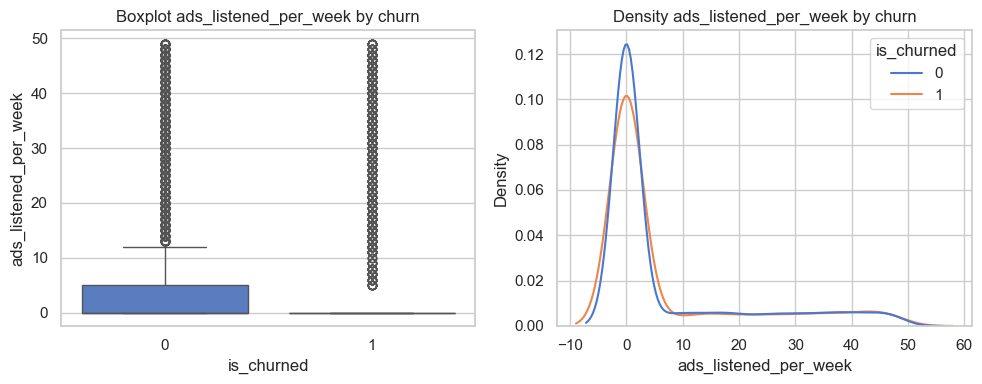

In [ ]:
# 주요 수치형 변수별 분포: boxplot + kde
num_features = ['listening_time','songs_played_per_day','skip_rate','ads_listened_per_week']
for col in num_features:
    if col in df.columns:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.boxplot(x='is_churned', y=col, data=df)
        plt.title(f'Boxplot {col} by churn')
        plt.subplot(1,2,2)
        sns.kdeplot(data=df, x=col, hue='is_churned', common_norm=False)
        plt.title(f'Density {col} by churn')
        plt.tight_layout()
        plt.show()

# listening_time 
# 이탈여부(0과 1)간 분포 차이가 별로 없음 / KDE 그래프 형태도 비슷함 -- listening_time 만으로 이탈 예측 어려움
# songs_played_per_day 도 유사

# skip_rate
# 박스 플롯 이상치 다수 존재 -- 이상치 처리 필요
# KDE-- 이탈 여부 간 분포 차이가 없음
# ads_listened_per_week
# 극단적인 이상치 매우 많음
# KDE 거의 동일 -- 직접적인 영향이 적음


,count,churn_rate
subscription_type,,
Family,1908,0.275157
Free,2018,0.249257
Premium,2115,0.250591
Student,1959,0.261868


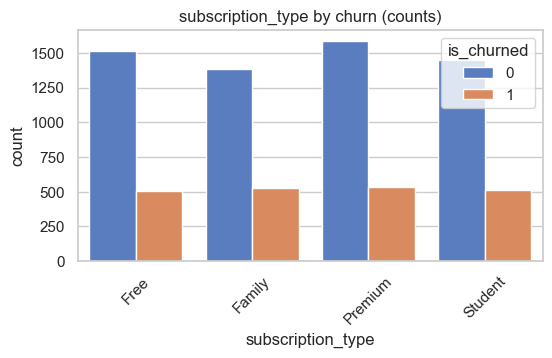

,count,churn_rate
device_type,,
Desktop,2778,0.257379
Mobile,2599,0.268950
Web,2623,0.250477


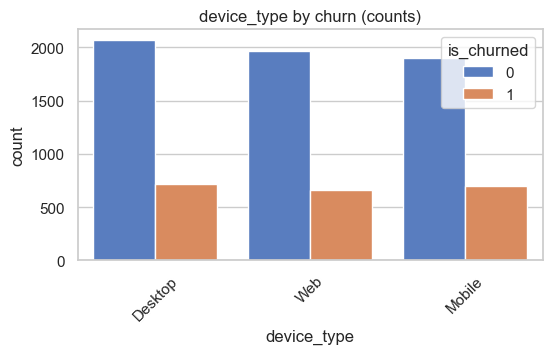

,count,churn_rate
offline_listening,,
0,2018,0.249257
1,5982,0.262120


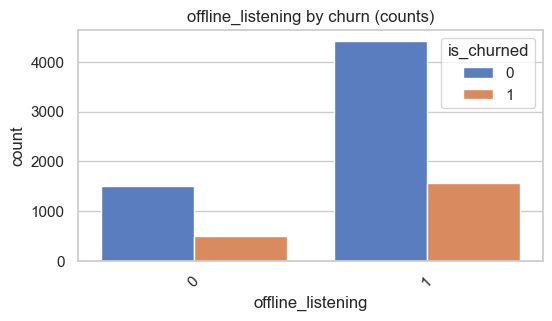

In [ ]:
# 범주형 변수별 churn 비율 확인
cat_features = ['subscription_type','device_type','offline_listening']
for col in cat_features:
    if col in df.columns:
        display(df.groupby(col)['is_churned'].agg(['count','mean']).rename(columns={'mean':'churn_rate'}))
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, hue='is_churned', data=df)
        plt.title(f'{col} by churn (counts)')
        plt.xticks(rotation=45)
        plt.show()

# subscription_type -- churn_rate : Family(약 0.27) 구독 플랜이 이탈률이 가장 높음
# device_type -- churn_rate : Mobile(약 0.269) 이탈률이 가장 높음
# offline_listening -- churn_rate : 1(약 0.262) 오프라인 듣기 기능 쓰는 사람이 이탈률이 약간 더 높음

Feature Engineering 탐색을 위해 ,,,,
좀 끄적여 봤습니다

In [ ]:
# 1) Inspect categorical distributions
cat_cols = ['gender','country','subscription_type','device_type','offline_listening']
for col in cat_cols:
    if col in df.columns:
        print(f"\n=== {col} ===")
        print('nunique:', df[col].nunique())
        print(df[col].value_counts(dropna=False).head(20))
# nunique - 고유값
# value_counts - 값 빈도
# 


=== gender ===
nunique: 3
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

=== country ===
nunique: 8
country
AU    1034
US    1032
DE    1015
IN    1011
PK     999
FR     989
UK     966
CA     954
Name: count, dtype: int64

=== subscription_type ===
nunique: 4
subscription_type
Premium    2115
Free       2018
Student    1959
Family     1908
Name: count, dtype: int64

=== device_type ===
nunique: 3
device_type
Desktop    2778
Web        2623
Mobile     2599
Name: count, dtype: int64

=== offline_listening ===
nunique: 2
offline_listening
1    5982
0    2018
Name: count, dtype: int64


In [ ]:
# 2) Check duplicates and user_id uniqueness
print('Total rows:', len(df))
print('Total unique user_id:', df['user_id'].nunique())
print('Duplicate rows count:', df.duplicated().sum())
if df.duplicated().sum()>0:
    display(df[df.duplicated(keep=False)].head())
# 중복 검사 - user_id 기준 고유값
# 총 행 8000개, user_id 고유값 8000개, == 중복 없음

Total rows: 8000
Total unique user_id: 8000
Duplicate rows count: 0


In [ ]:
# 3) Simple missing value treatment (median imputation) on a copy
missing_before = df[['listening_time','songs_played_per_day']].isnull().sum()
print('Missing before:\n', missing_before)
df_filled = df.copy()
for col in ['listening_time','songs_played_per_day']:
    if col in df_filled.columns:
        df_filled[col] = df_filled[col].fillna(df_filled[col].median())
missing_after = df_filled[['listening_time','songs_played_per_day']].isnull().sum()
print('Missing after (median fill):\n', missing_after)
# df remains unchanged; use df_filled for further experiments
# listening_time, songs_played_per_day 결측값 각각 240개 
# median 대체 후 결측값 0개

Missing before:
 listening_time          240
songs_played_per_day    240
dtype: int64
Missing after (median fill):
 listening_time          0
songs_played_per_day    0
dtype: int64


In [ ]:
# 4) Feature engineering example
# listening_time binning 별 이탈률
df_feat = df_filled.copy()
# cap skip_rate between 0 and 1
if 'skip_rate' in df_feat.columns:
    df_feat['skip_rate_capped'] = df_feat['skip_rate'].clip(lower=0, upper=1)
# listening_time binning
if 'listening_time' in df_feat.columns:
    bins = [-1, 15, 45, 120, df_feat['listening_time'].max()]
    labels = ['very_low','low','medium','high']
    df_feat['listening_time_bin'] = pd.cut(df_feat['listening_time'], bins=bins, labels=labels)
# engagement score (normalized sum)
if 'listening_time' in df_feat.columns and 'songs_played_per_day' in df_feat.columns:
    lt = df_feat['listening_time'].fillna(0)
    sp = df_feat['songs_played_per_day'].fillna(0)
    df_feat['engagement_score'] = (lt/ (lt.max() if lt.max()>0 else 1)) + (sp/ (sp.max() if sp.max()>0 else 1))
# show group stats vs churn
print('Churn rate by listening_time_bin:')
if 'listening_time_bin' in df_feat.columns:
    display(df_feat.groupby('listening_time_bin')['is_churned'].agg(['count','mean']).rename(columns={'mean':'churn_rate'}))
print('\nCorrelation of new features with is_churned:')
for c in ['skip_rate_capped','engagement_score']:
    if c in df_feat.columns:
        print(c, df_feat[c].corr(df_feat['is_churned']))

Churn rate by listening_time_bin:


C:\Users\Playdata\AppData\Local\Temp\ipykernel_29488\1358014415.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_feat.groupby('listening_time_bin')['is_churned'].agg(['count','mean']).rename(columns={'mean':'churn_rate'}))


,count,churn_rate
listening_time_bin,,
very_low,168,0.261905
low,793,0.257251
medium,2065,0.265375
high,4974,0.256333



Correlation of new features with is_churned:
skip_rate_capped 0.019809319038918496
engagement_score 0.001963145173144164
